# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import re
from  bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

In [2]:
pwd

'C:\\Users\\Mrunali\\ReLI'

In [3]:
df = pd.read_csv(r'C:\Users\Mrunali\Downloads\sentiment-analysis-on-movie-reviews\sampleSubmission.csv')
df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [4]:
train_ = pd.read_table(r"C:\Users\Mrunali\Downloads\sentiment-analysis-on-movie-reviews\train.tsv\train.tsv")

In [5]:
train_

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


# Explanatory Data Analysis

In [6]:
train_.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [7]:
test_ = pd.read_csv("C:/Users/Mrunali/Downloads/sentiment-analysis-on-movie-reviews/test.tsv/test.tsv", sep = '\t')
test_

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [8]:
pd.set_option("display.max_colwidth", None)
train_.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [9]:
train_["Sentiment"].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [10]:
train_["Sentiment"].value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [11]:
df_filtered=train_[train_["Sentiment"]!=2]
df_filtered["Sentiment1"]=np.where(df_filtered["Sentiment"].isin([0,1]), 1,0)

C:\Users\Mrunali\AppData\Local\Temp/ipykernel_3864/1777778286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Sentiment1"]=np.where(df_filtered["Sentiment"].isin([0,1]), 1,0)


In [12]:
df_filtered["Sentiment1"].value_counts()

0    42133
1    34345
Name: Sentiment1, dtype: int64

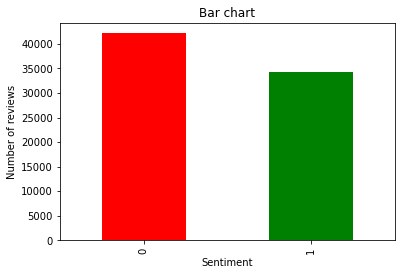

In [13]:
count_Class=pd.value_counts(df_filtered['Sentiment1'], sort= True)
count_Class.plot(kind= 'bar',color = ['red','green'])
plt.title('Bar chart')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()


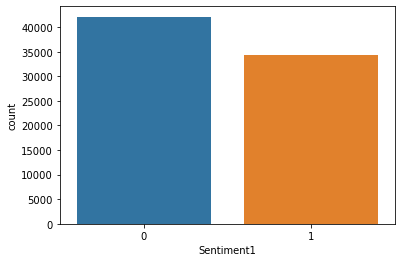

In [14]:
sns.countplot(data=df_filtered, x=df_filtered["Sentiment1"])
plt.show()

# Cleaning Parts of text Data

In [15]:
from nltk.corpus import stopwords
my_stopword=list(stopwords.words("english"))

In [16]:
own_stopwords=["movie", "actor"]

# Remove or replace contractions words

In [17]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [18]:
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [19]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             # removing website links
    review = BeautifulSoup(review, 'lxml').get_text()   # removing html tags
    review = decontract(review)                         # decontracting
    review = re.sub("\S*\d\S*", "", review).strip()     # removing the words with numeric digits
    review = re.sub('[^A-Za-z]+', ' ', review)          # removing non-word characters
    review = review.lower()                             # converting to lower case
    review = [word for word in review.split(" ") if not word in my_stopword] # removing stop words
    review = [lemmatizer.lemmatize(token) for token in review] #Lemmatization
    review = [word for word in review if len(word)>3 ]
    review = " ".join(review)
    review.strip()
    return review

In [20]:
df_filtered["Phrase1"]=df_filtered["Phrase"].apply(lambda x : preprocess_text(x))

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\bs4\__init__.py:346: MarkupResemblesLocatorWarning: "con" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Mrunali\AppData\Local\Temp/ipykernel_3864/3022592351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Phrase1"]=df_filtered["Phrase"].apply(lambda x : preprocess_text(x))


In [21]:
df_filtered.head() 

,PhraseId,SentenceId,Phrase,Sentiment,Sentiment1,Phrase1
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,1,series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story
21,22,1,good for the goose,3,0,good goose
22,23,1,good,3,0,good
33,34,1,"the gander , some of which occasionally amuses but none of which amounts to much of a story",1,1,gander occasionally amuses none amount much story
46,47,1,amuses,3,0,amuses


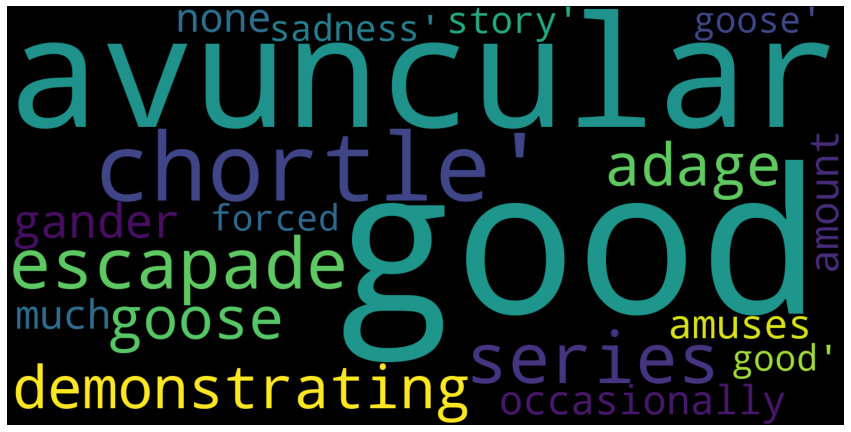

In [22]:
from wordcloud import WordCloud
text = df_filtered['Phrase1'].values 
wordcloud = WordCloud(max_words = 5000 , width = 1400 , height = 700).generate(str(text))
plt.figure(figsize = (15,18))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
x=df_filtered["Phrase1"]
y=df_filtered["Sentiment1"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_val, y_train , y_val=train_test_split(x, y, test_size=.2, random_state=0)

In [26]:
df_filtered.shape

(76478, 6)

In [27]:
x_train.shape

(61182,)

In [28]:
x_train

137989                                                     fresh sometimes funny usually genuinely worthwhile
19850                                                                                                    rose
55588                                                                                      wonderfully creepy
6304      camouflage carvey considering paper wear head public avoid recognized bilked unsuspecting moviegoer
51919                                                                         including knockout closing line
                                                         ...                                                 
45646            counting gross comedy trying forget first film long time made want bolt theater first minute
95293                                                jerking byzantine incarnation bother pleasuring audience
88836                                                              schticky chris rock stolid anthony hopkins
90735     

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vect =CountVectorizer(stop_words="english", lowercase=True, min_df=20, max_df=.5)

In [31]:
vect.fit(x_train) 

CountVectorizer(max_df=0.5, min_df=20, stop_words='english')

In [32]:
vect.get_feature_names()

['abandon',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'absorbing',
 'abstract',
 'absurd',
 'absurdity',
 'abuse',
 'accent',
 'accept',
 'acceptable',
 'accessible',
 'accomplished',
 'accomplishment',
 'account',
 'accurate',
 'ache',
 'achieve',
 'achievement',
 'achieves',
 'achingly',
 'acted',
 'acting',
 'action',
 'actor',
 'actress',
 'actual',
 'actually',
 'adam',
 'adaptation',
 'added',
 'addition',
 'adequate',
 'admirable',
 'admire',
 'admit',
 'adolescent',
 'adrenaline',
 'adult',
 'advantage',
 'adventure',
 'adventurous',
 'affair',
 'affecting',
 'affection',
 'affirming',
 'afraid',
 'african',
 'aged',
 'aging',
 'ahead',
 'aimless',
 'alabama',
 'album',
 'alien',
 'alive',
 'allen',
 'allow',
 'allowed',
 'allows',
 'alternately',
 'alternative',
 'altogether',
 'amateurish',
 'amazing',
 'ambiguous',
 'ambition',
 'ambitious',
 'america',
 'american',
 'amiable',
 'amused',
 'amusing',
 'analyze',
 'anderson',
 'angel',
 'anger',
 'angle',
 'angst',
 '

In [33]:
len(vect.get_feature_names()) 

2656

In [34]:
vect.vocabulary_  

{'fresh': 952,
 'funny': 966,
 'usually': 2517,
 'genuinely': 985,
 'worthwhile': 2638,
 'wonderfully': 2623,
 'creepy': 498,
 'paper': 1629,
 'wear': 2584,
 'head': 1072,
 'public': 1801,
 'avoid': 134,
 'moviegoer': 1508,
 'including': 1172,
 'closing': 373,
 'line': 1351,
 'cinematic': 353,
 'badly': 143,
 'hard': 1061,
 'sell': 2028,
 'image': 1151,
 'fact': 834,
 'onscreen': 1587,
 'presence': 1753,
 'rare': 1833,
 'riveting': 1937,
 'written': 2645,
 'year': 2648,
 'word': 2628,
 'really': 1848,
 'justice': 1271,
 'best': 177,
 'screen': 2009,
 'work': 2629,
 'suspect': 2311,
 'time': 2388,
 'sitting': 2109,
 'hugely': 1129,
 'rewarding': 1924,
 'experience': 811,
 'wildly': 2604,
 'inventive': 1238,
 'mixture': 1487,
 'comedy': 396,
 'melodrama': 1451,
 'hitting': 1101,
 'documentary': 648,
 'decent': 551,
 'modern': 1488,
 'technology': 2342,
 'viewer': 2537,
 'inside': 1202,
 'wave': 2581,
 'worst': 2636,
 'film': 888,
 'summer': 2291,
 'small': 2133,
 'considerable': 440,
 'a

In [35]:
x_train_trans=vect.transform(x_train) 

In [36]:
x_train_cl=pd.DataFrame(x_train_trans.toarray(), columns=vect.get_feature_names())

In [37]:
x_train_cl

,abandon,ability,able,absolute,absolutely,absorbing,abstract,absurd,absurdity,abuse,...,wrong,yarn,year,yearning,york,young,younger,youthful,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x_val_trans=vect.transform(x_val)

In [39]:
x_val_cl=pd.DataFrame(x_val_trans.toarray(), columns=vect.get_feature_names())
x_val_cl

,abandon,ability,able,absolute,absolutely,absorbing,abstract,absurd,absurdity,abuse,...,wrong,yarn,year,yearning,york,young,younger,youthful,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15292,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression(max_iter=10000)

In [41]:
logR.fit(x_train_cl, y_train)

LogisticRegression(max_iter=10000)

In [42]:
print("Train Score :", logR.score(x_train_cl, y_train))
print("val Score :", logR.score(x_val_cl, y_val))

Train Score : 0.811055539210879
val Score : 0.7930177824267782


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = TfidfVectorizer()
tfidf_text = vectorizer.fit_transform(x_train)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [46]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])

nb.fit(x_train,y_train)

test_predict = nb.predict(x_val)


In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [48]:
train_accuracy = round(nb.score(x_train,y_train)*100)
test_accuracy =round(accuracy_score(test_predict, y_val)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()


Naive Bayes Train Accuracy Score : 88% 
Naive Bayes Test Accuracy Score  : 86% 



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(x_train, y_train)

test_predict = dt.predict(x_val)

train_accuracy = round(dt.score(x_train, y_train)*100)
test_accuracy =round(accuracy_score(test_predict, y_val)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()


Decision Tree Train Accuracy Score : 98% 
Decision Tree Test Accuracy Score  : 87% 



In [51]:
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),
               ])

knn.fit(x_train, y_train)

test_predict = knn.predict(x_val)

train_accuracy = round(knn.score(x_train, y_train)*100)
test_accuracy =round(accuracy_score(test_predict, y_val)*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()

K-Nearest Neighbour Train Accuracy Score : 91% 
K-Nearest Neighbour Test Accuracy Score  : 87% 



Best Model: Naive Bayes with train accuracy of 88% and test accuracy of 86%